# Apple stocks time course

In [1]:
%pylab inline

from matplotlib import style
style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# standard python packages
import requests
import pandas as pd

In [3]:
# machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Use this [API](https://financialmodelingprep.com/developer/docs/) for downloading daily stock prices. Read a basic example [here](https://codingandfun.com/python-for-finance-stock-price-trend-analysis/)

In [4]:
myquery = 'https://financialmodelingprep.com/api/v3/historical-price-full/aapl?serietype=line'

appl = requests.get(myquery) # APPLE stocks
type(appl)

requests.models.Response

In [5]:
histprices = appl.json() # get all historical prices
# only the last 365 days
histprices = histprices['historical'][-365:] # last year
histprices[0]

{u'close': 217.36, u'date': u'2018-10-15'}

In [6]:
# convert to DataFrame
aapl_df = pd.DataFrame.from_dict(histprices)

In [7]:
aapl_df.head(5)

,close,date
0,217.36,2018-10-15
1,222.15,2018-10-16
2,221.19,2018-10-17
3,216.02,2018-10-18
4,219.31,2018-10-19


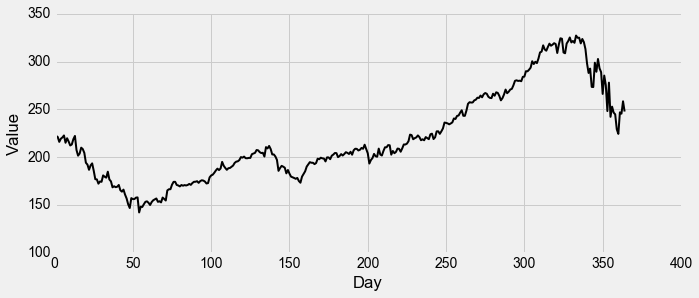

In [8]:
plt.figure(figsize=(10,4))
plt.plot(aapl_df['close'].values, color='black', lw = 2)#, aapl_df['close'].values)
plt.ylabel('Value'), plt.xlabel('Day')
plt.grid('on')
#histpricesdf.plot(x='date', y = 'close')

In [9]:
def polynomial_fit(x, y , degree):
    """
    Polynomial fit on the set of x,y values
    
    x (independent variable, column vector)
    y (dependent variable, row vector)
    degreee (int)
    
    Return the squared root of the mean squared error
    """
    

    features = PolynomialFeatures(degree)
    x_poly = features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    
    return (rmse, r2)    

Polynomial degree 2, RMSE = 21.21249, R2 = 0.7965
Polynomial degree 3, RMSE = 18.22071, R2 = 0.8499
Polynomial degree 4, RMSE = 17.75331, R2 = 0.8575
Polynomial degree 5, RMSE = 9.18511, R2 = 0.9618
Polynomial degree 6, RMSE = 8.84660, R2 = 0.9646
Polynomial degree 7, RMSE = 9.59979, R2 = 0.9583
Polynomial degree 8, RMSE = 12.52416, R2 = 0.9291
Polynomial degree 9, RMSE = 13.95951, R2 = 0.9119


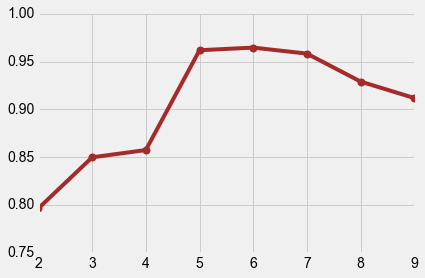

In [10]:
y = aapl_df['close'].values
x = np.arange(y.size)

# you want a COLUMN vector (many samples, 1 feature)
X = x.reshape(-1,1)

poly = list()
for i in range(2,10):
    rmse, r2 = polynomial_fit(X,y,i)
    myval = (i, rmse, r2)
    poly.append(r2)
    print('Polynomial degree %d, RMSE = %2.5f, R2 = %2.4f'%myval)
    
plt.figure(figsize=(6,4))
plt.plot(range(2,10), poly, 'ko-', color='brown');
plt.xticks(range(2,10));

In [11]:
# Polynomial transform
y = aapl_df['close'].values
x = np.arange(x.size)

# you want a COLUMN vector (many samples, 1 feature)
X = x.reshape(-1,1)

# you want a ROW vector (one sample, many features)
#X = X.reshape(1,1)

polynomial_features= PolynomialFeatures(degree=6)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE of polynomial degree i is %2.4f'%rmse)
print('R2 of polynomial regression is %2.4f'%r2)

RMSE of polynomial degree i is 8.8466
R2 of polynomial regression is 0.9646


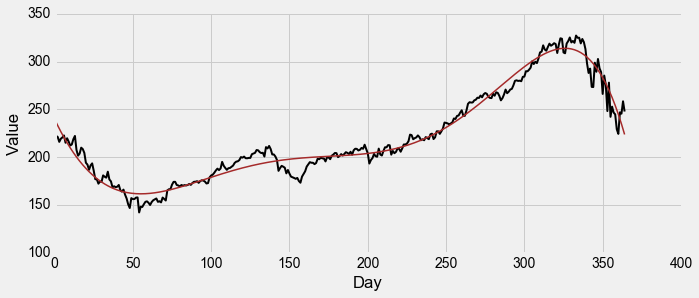

In [12]:
plt.figure(figsize=(10,4))
plt.plot(x,y, color='black', lw =2 )
# sort the values of x before line plot
plt.plot(x, y_poly_pred, color='brown', lw =1.5 )
plt.ylabel('Value'), plt.xlabel('Day')
plt.grid('on')